In [2]:
from SALib import ProblemSpec
from SALib.test_functions import Sobol_G
import numpy as np

import matplotlib.pyplot as plt

In [3]:
def sobol_g_param(n):
    names_arr = []
    a_ar=[]
    delta_ar=[]
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

        a_i = (i-1) / 2
        a_ar.append(a_i)

        delta_ar.append(0)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })
    return sp, a_ar, delta_ar

sp_4, a_arr_4, delta_arr_4 = sobol_g_param(4)
sp_40, a_arr_40, delta_arr_40 = sobol_g_param(40)
sp_400, a_arr_400, delta_arr_400 = sobol_g_param(400)

# Sobol Indices

Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	6144 samples
Outputs:
	1 outputs: ['Y']
	6144 evaluations
Analysis:
          ST   ST_conf
x0  0.796221  0.138491
x1  0.342199  0.066888
x2  0.166954  0.029612
x3  0.103334  0.022782
          S1   S1_conf
x0  0.469403  0.078030
x1  0.119085  0.052949
x2  0.053520  0.032027
x3  0.026302  0.027290



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


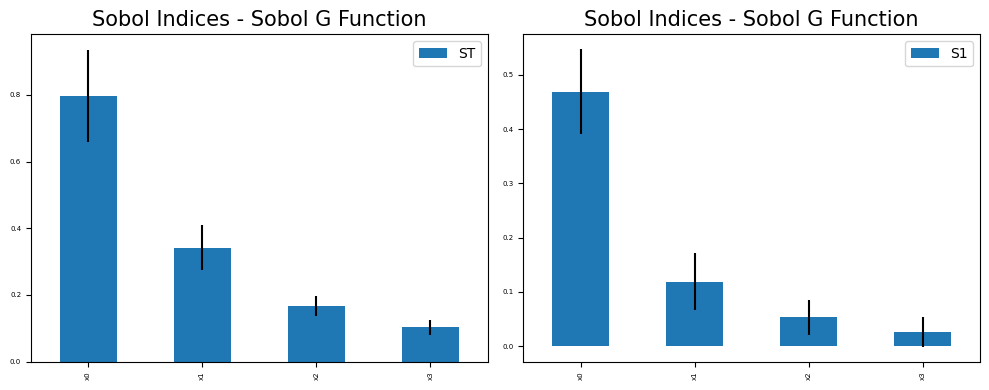

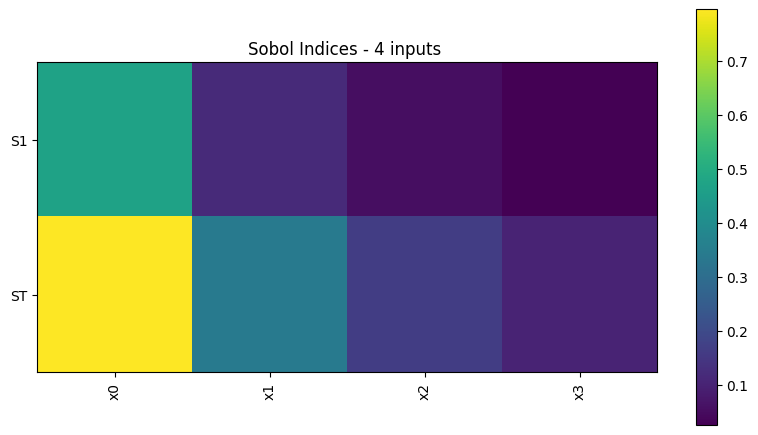

In [9]:

# ==== Sobol Indices ~ Sobol G-Function ===
def si_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list, log_bool=False):

    (sp.sample_sobol(1024, calc_second_order=False).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_sobol(calc_second_order=False))
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    if log_bool:
        axes[0].set_yscale('log') # set plot to log scale
        axes[1].set_yscale('log') # set plot to log scale

    for axis in axes:
        axis.set_title(label=f"Sobol Indices - Sobol G Function", size=15)
        axis.tick_params(axis='y', labelsize=5)
        if n < 100:
            axis.tick_params(axis='x', labelsize=5)
    fig = plt.gcf() # get current figure
    fig.set_size_inches(10, 4)
    plt.tight_layout()

    sp.heatmap(title=f"Sobol Indices - {n} inputs ")

si_sobol_g(4, sp_4, a_arr_4, delta_arr_4)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	6144 samples
Outputs:
	1 outputs: ['Y']
	6144 evaluations
Analysis:
          ST   ST_conf
x0  0.759432  0.118435
x1  0.315153  0.051439
x2  0.169411  0.031863
x3  0.104650  0.020030
          S1   S1_conf
x0  0.460877  0.070255
x1  0.098405  0.044156
x2  0.054965  0.036121
x3  0.034129  0.023697

CPU times: user 178 ms, sys: 115 ms, total: 293 ms
Wall time: 175 ms


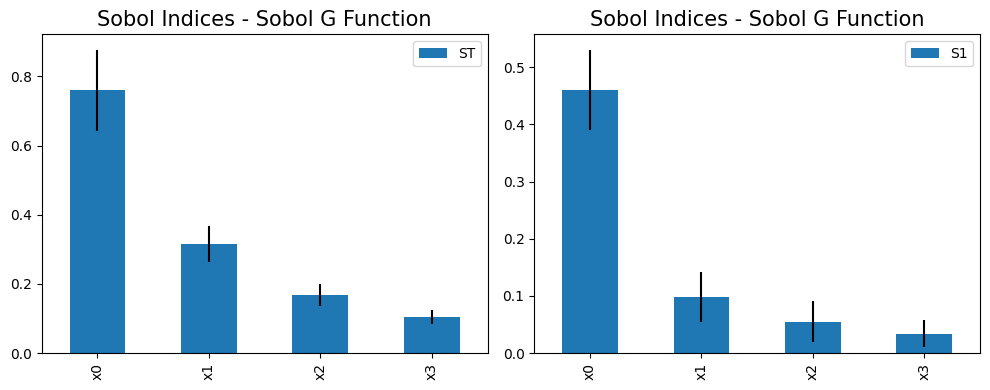

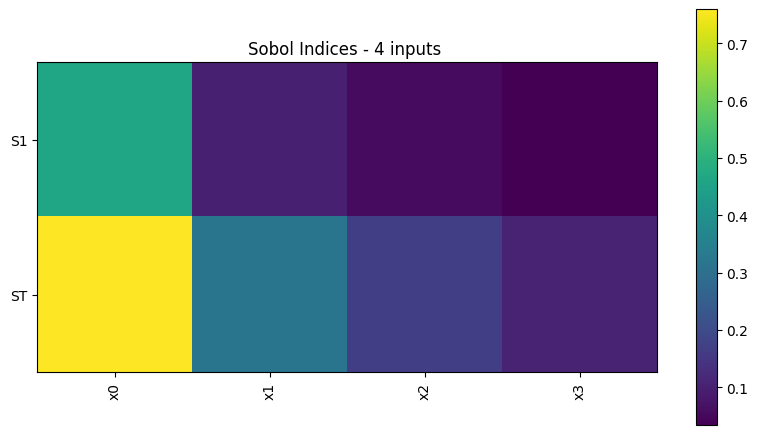

In [7]:
%%time
si_sobol_g(4, sp_4, a_arr_4, delta_arr_4)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	43008 samples
Outputs:
	1 outputs: ['Y']
	43008 evaluations
Analysis:
           ST   ST_conf
x0   0.748816  0.178100
x1   0.301145  0.068085
x2   0.156460  0.034551
x3   0.097132  0.023034
x4   0.060756  0.017921
x5   0.044453  0.015251
x6   0.031744  0.012798
x7   0.026108  0.006090
x8   0.022017  0.005701
x9   0.018251  0.007102
x10  0.015235  0.005060
x11  0.009644  0.002466
x12  0.007211  0.002087
x13  0.013010  0.004652
x14  0.007473  0.003274
x15  0.007301  0.002380
x16  0.006230  0.001791
x17  0.005802  0.002241
x18  0.004556  0.001808
x19  0.003837  0.000908
x20  0.004266  0.001854
x21  0.004023  0.001753
x22  0.003300  0.001093
x23  0.002888  0.000764
x24  0.002819  0.001069
x25  0.00

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


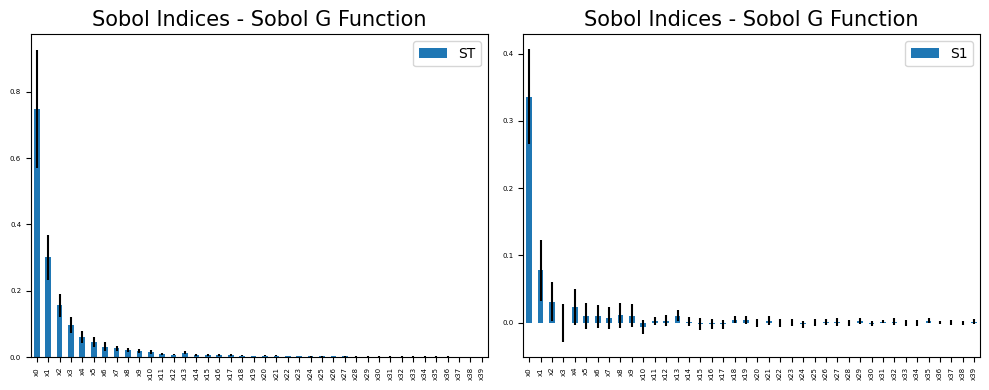

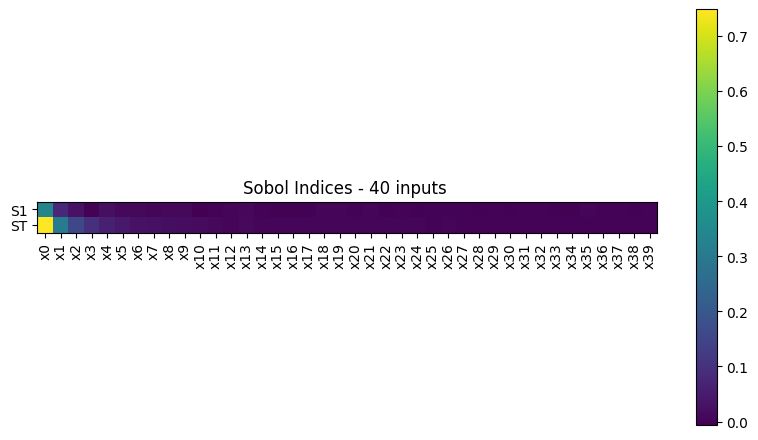

In [10]:
%%time
si_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


CPU times: user 40.5 s, sys: 2.23 s, total: 42.8 s
Wall time: 42.5 s


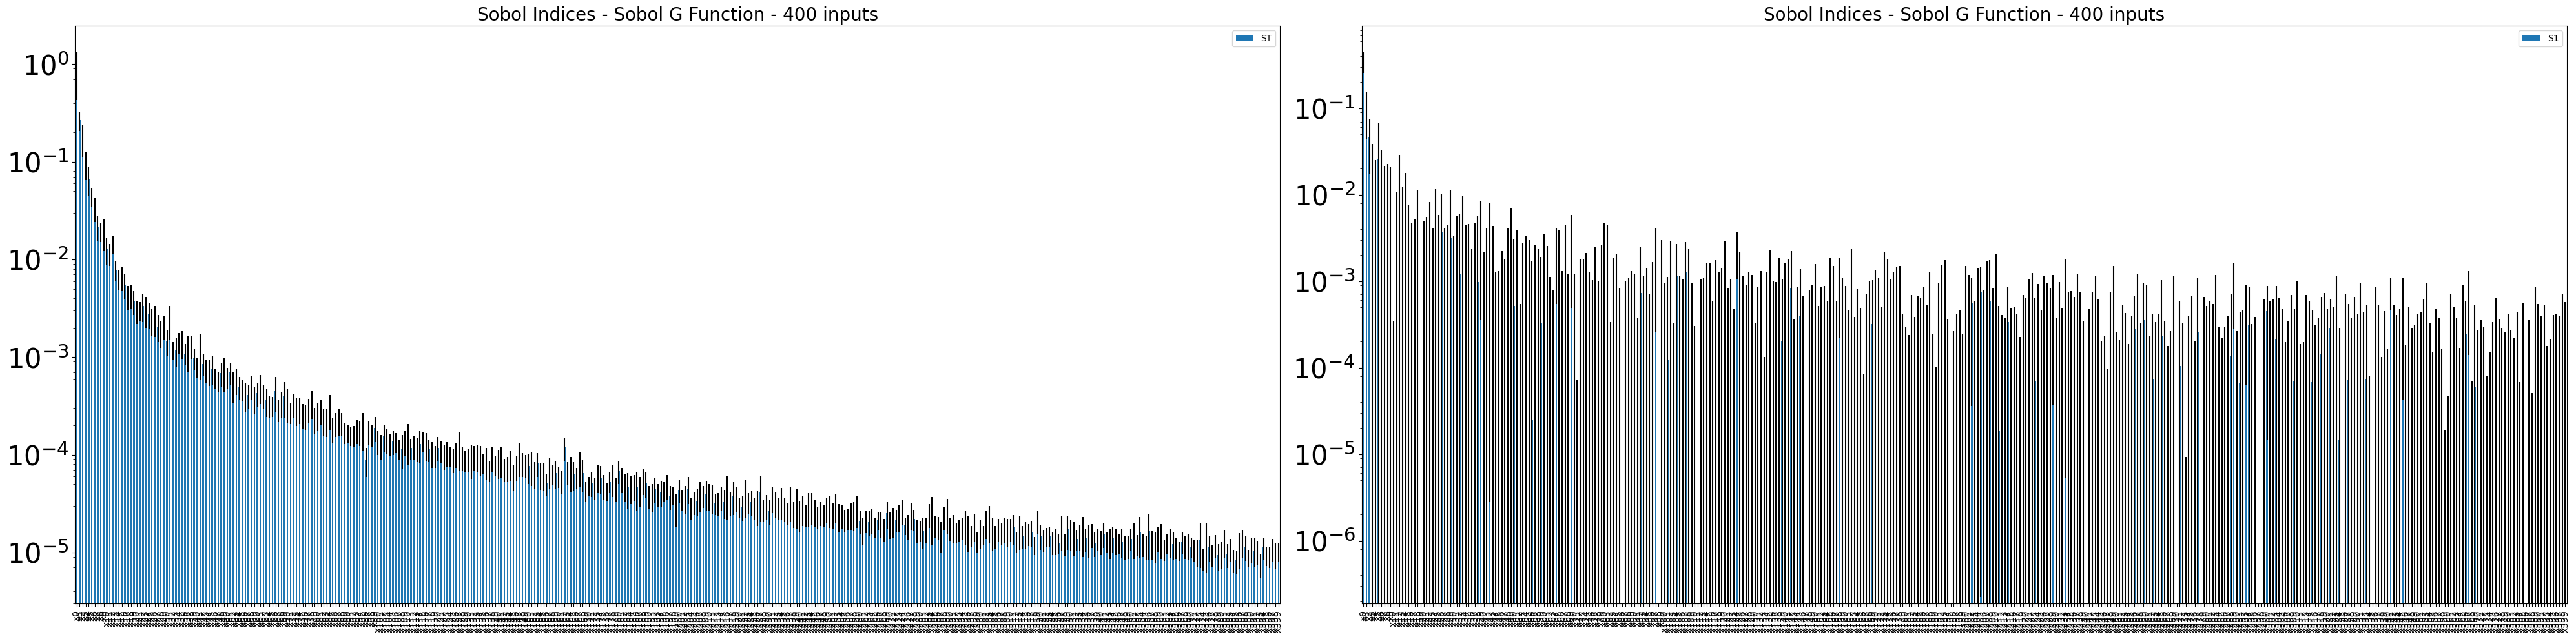

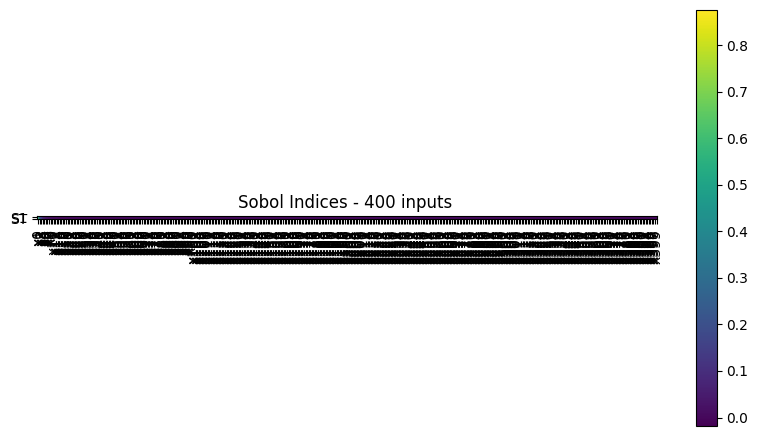

In [14]:
%%time
si_sobol_g(400, sp_400, a_arr_400, delta_arr_400, True)

# FAST

In [31]:
%%time
# ==== FAST ~ Sobol G-Function ===
def fast_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list, log_bool=False):

    (sp.sample_fast(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_fast())   
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    if log_bool:
        axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(20, 4)
    plt.title(label=f"FAST - Sobol G Function", size=15)
    if n < 100:
        plt.xticks(fontsize=30)
    axes.set_title(label=f"FAST - Sobol G Function", size=20)
    axes.tick_params(axis='x', labelsize=15)
    axes.tick_params(axis='y', labelsize=15)
    plt.tight_layout()



CPU times: user 3 μs, sys: 1 μs, total: 4 μs
Wall time: 6.91 μs


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	4096 samples
Outputs:
	1 outputs: ['Y']
	4096 evaluations
Analysis:
          S1        ST   S1_conf   ST_conf
x0  0.444266  0.762722  0.015162  0.036997
x1  0.110720  0.327400  0.014107  0.037925
x2  0.046326  0.167270  0.014436  0.040203
x3  0.026168  0.105762  0.014640  0.039633

CPU times: user 120 ms, sys: 61.9 ms, total: 182 ms
Wall time: 128 ms


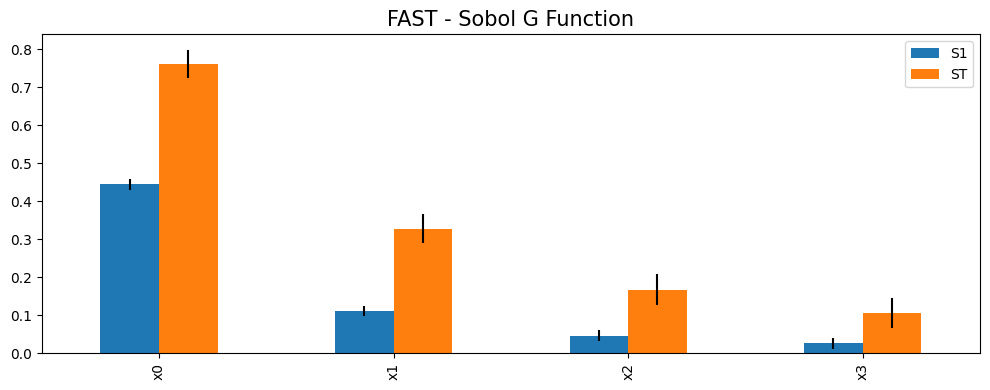

In [25]:
%%time
fast_sobol_g(4, sp_4, a_arr_4, delta_arr_4)

Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	40960 samples
Outputs:
	1 outputs: ['Y']
	40960 evaluations
Analysis:
           S1        ST   S1_conf   ST_conf
x0   0.144102  0.648678  0.015412  0.038146
x1   0.043341  0.337361  0.011236  0.032343
x2   0.011027  0.148990  0.015568  0.043159
x3   0.002869  0.090076  0.014937  0.039055
x4   0.003010  0.056165  0.012373  0.041259
x5   0.001593  0.041964  0.013968  0.038827
x6   0.002143  0.036406  0.013516  0.037948
x7   0.001997  0.031754  0.016770  0.035743
x8   0.001127  0.133945  0.014519  0.035607
x9   0.013571  0.029532  0.014480  0.038655
x10  0.001113  0.020382  0.015906  0.043194
x11  0.006916  0.019406  0.015628  0.039136
x12  0.006674  0.018564  0.013346  0.037889
x13  0.000182  0.

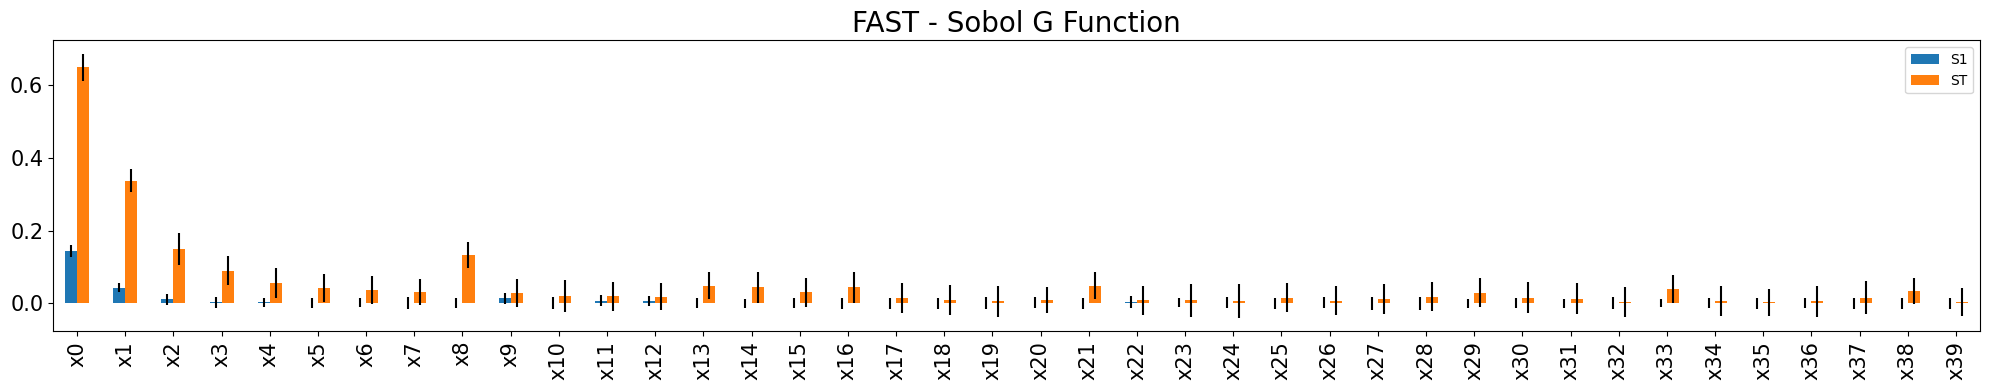

In [32]:
%%time
fast_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

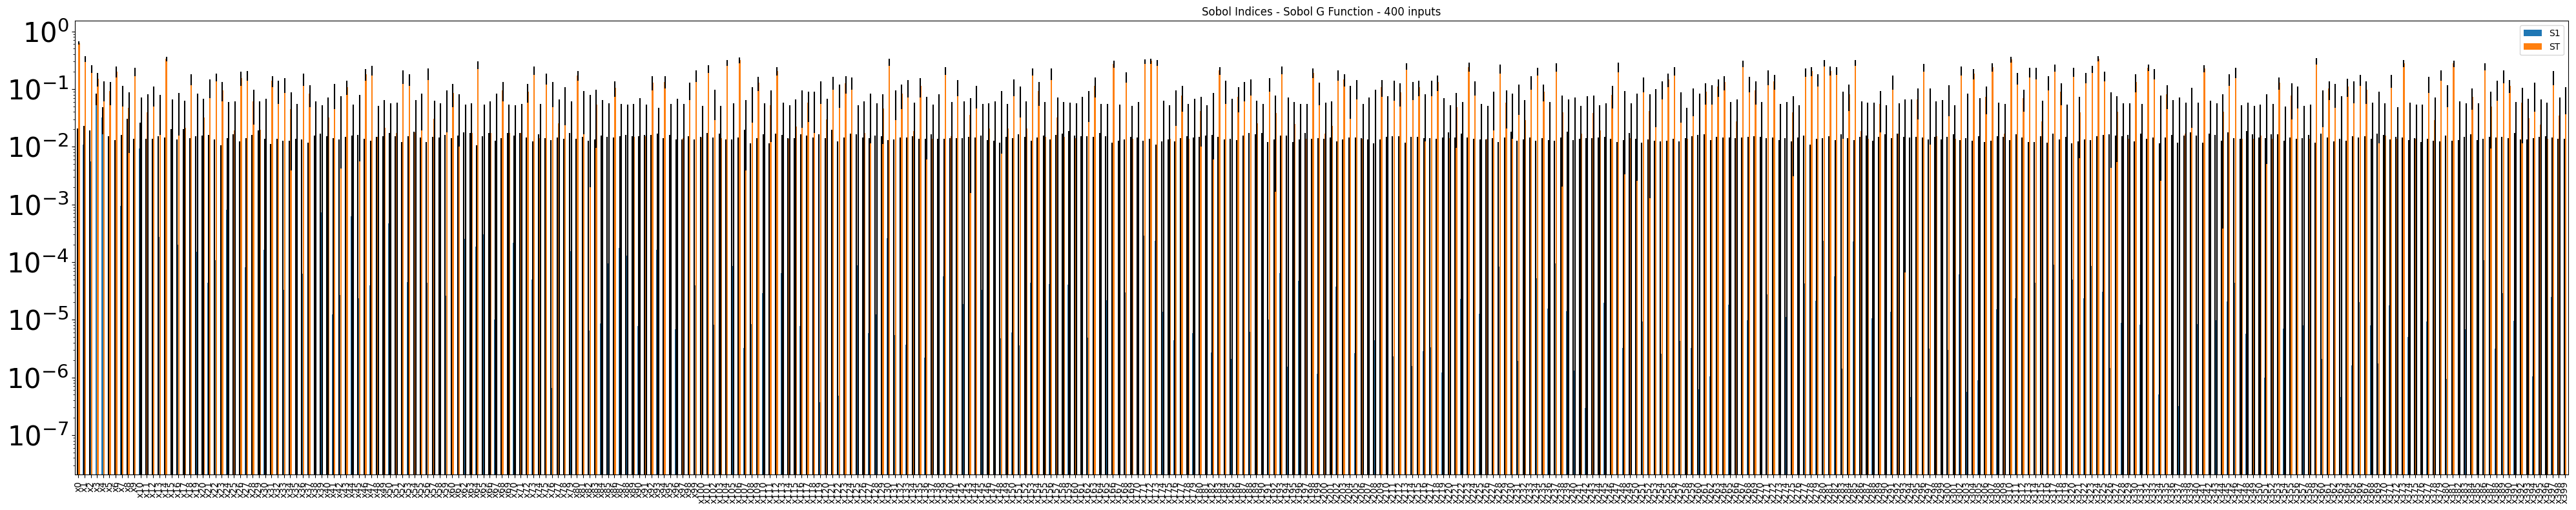

In [36]:
%%time
fast_sobol_g(400, sp_400, a_arr_400, delta_arr_400, True)

# RBD-FAST

In [35]:
%%time
# ==== RBD-FAST ~ Sobol G-Function ===
def rbd_fast_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list, log_bool=False):

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_rbd_fast())   
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    if log_bool:
        axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(20, 4)
    plt.title(label=f"RBD-FAST - Sobol G Function - {n} inputs", size=20)
    plt.yticks(fontsize=30)
    if n < 100:
        plt.xticks(fontsize=30)
    axes.set_title(label=f"RBD-FAST - Sobol G Function", size=20)
    axes.tick_params(axis='x', labelsize=15)
    axes.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

CPU times: user 10 μs, sys: 3 μs, total: 13 μs
Wall time: 14.8 μs


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
          S1   S1_conf
x0  0.497340  0.058982
x1  0.118333  0.056389
x2  0.027289  0.038392
x3  0.018580  0.030722

CPU times: user 104 ms, sys: 39.5 ms, total: 143 ms
Wall time: 104 ms


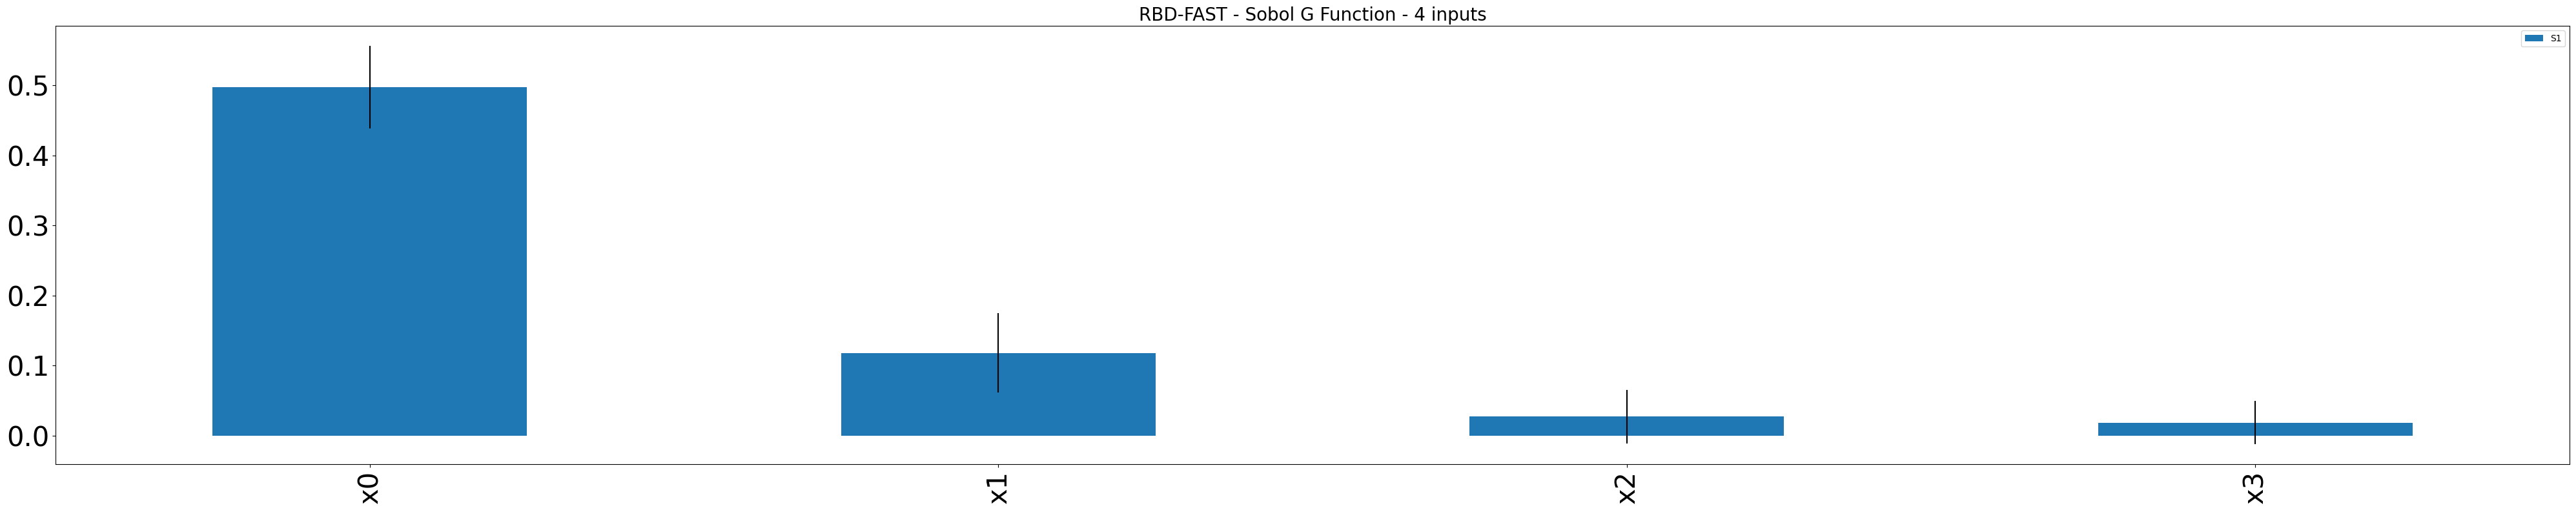

In [32]:
%%time
rbd_fast_sobol_g(4, sp_4, a_arr_4, delta_arr_4)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
           S1   S1_conf
x0   0.324780  0.086296
x1   0.085888  0.052932
x2   0.036479  0.041542
x3   0.029160  0.045270
x4   0.025266  0.028843
x5   0.006292  0.036940
x6   0.002854  0.026364
x7   0.002974  0.026031
x8  -0.000809  0.026076
x9   0.000389  0.027516
x10 -0.000341  0.027777
x11 -0.001958  0.024500
x12  0.000282  0.031273
x13  0.001900  0.025404
x14 -0.003540  0.022165
x15  0.008142  0.027834
x16  0.000512  0.022491
x17 -0.001331  0.023091
x18  0.002965  0.027903
x19  0.008021  0.025086
x20 -0.000713  0.027044
x21 -0.006261  0.029380
x22  0.007053  0.025905
x23 -0.005277  0.023020
x24 -0.001116  0.025102
x25 -0.0029

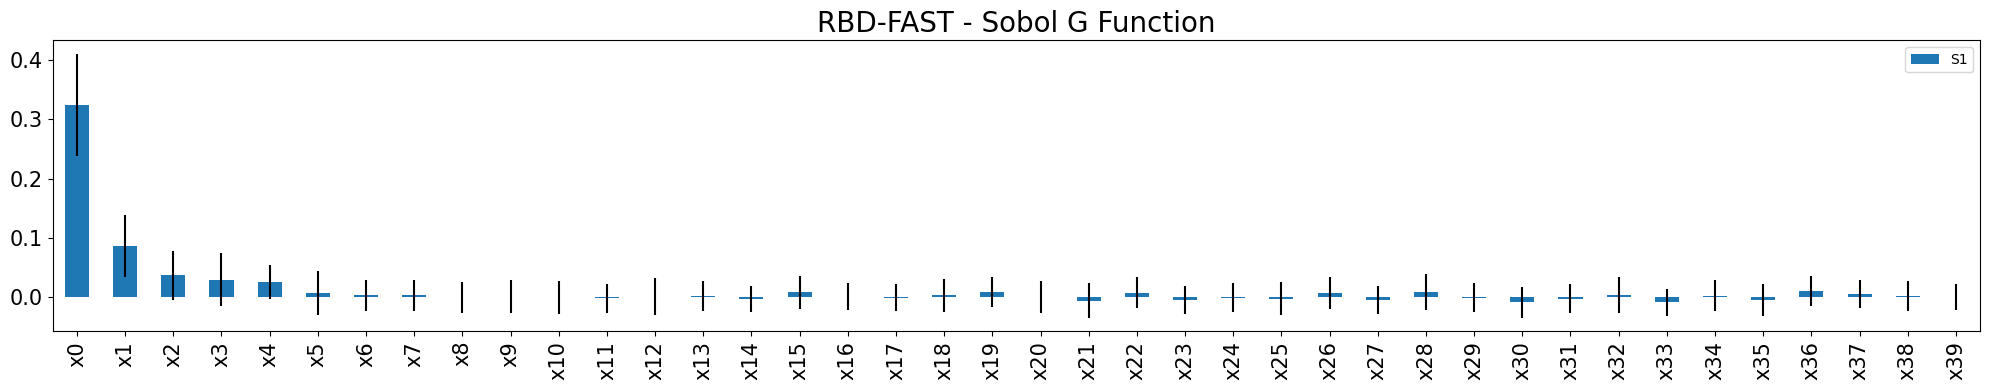

In [36]:
%%time
rbd_fast_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

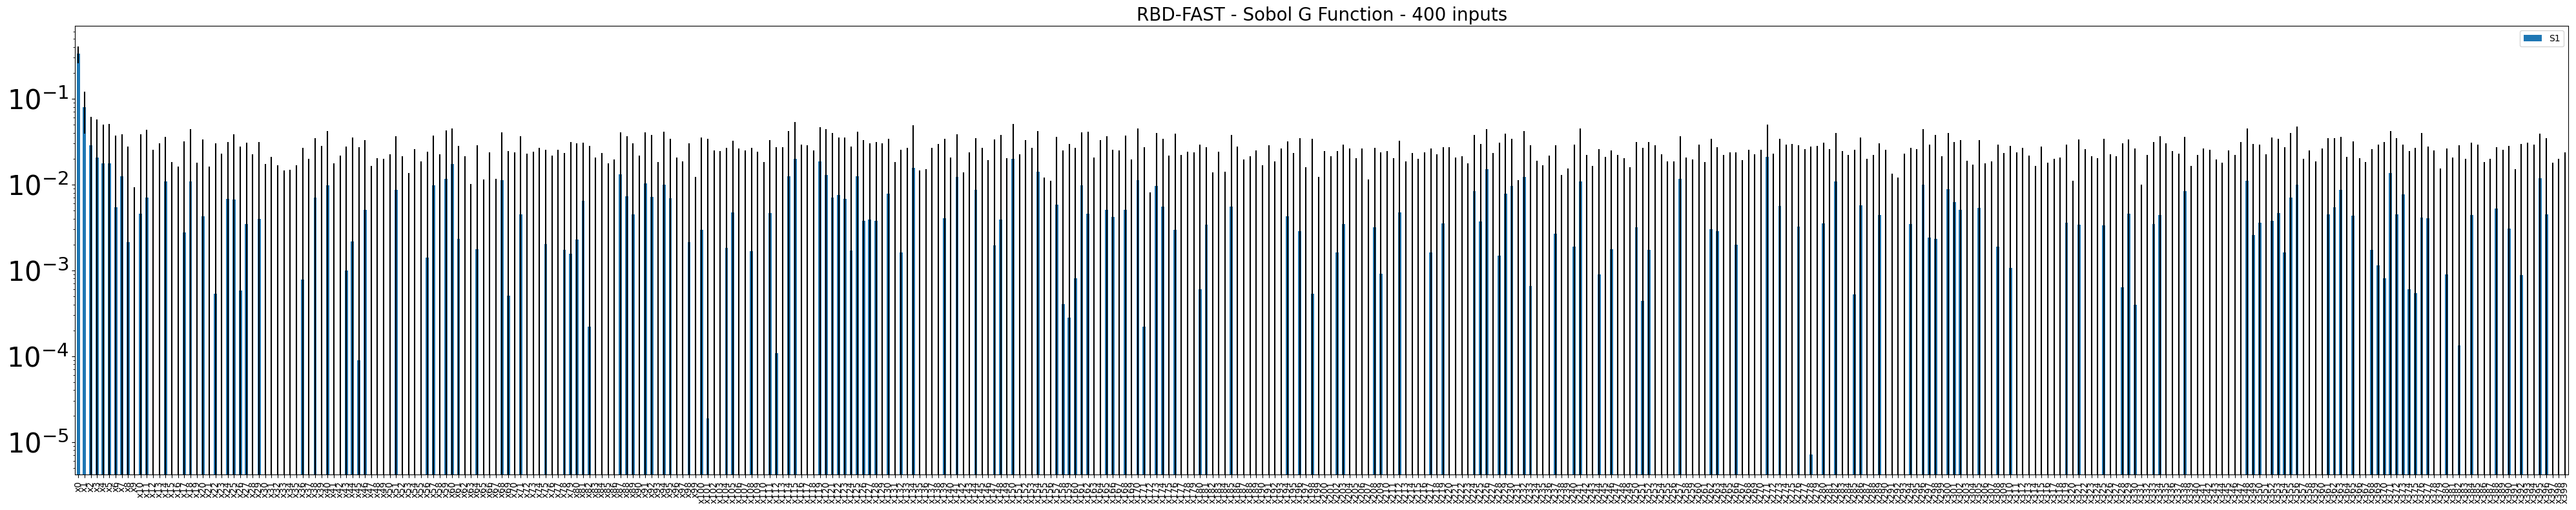

In [35]:
%%time
rbd_fast_sobol_g(400, sp_400, a_arr_400, delta_arr_400, True)

# Delta Moment-Independence

In [41]:

# ==== Delta ~ Sobol G-Function ===
def delta_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list, log_bool=False):

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_delta())   
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    if log_bool:
        axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(20, 4)
    plt.title(label=f"Delta - Sobol G Function - {n} inputs", size=20)
    plt.yticks(fontsize=30)
    if n < 100:
        plt.xticks(fontsize=30)
    axes.set_title(label=f"Delta - Sobol G Function", size=20)
    axes.tick_params(axis='x', labelsize=15)
    axes.tick_params(axis='y', labelsize=15)
    plt.tight_layout()



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
       delta  delta_conf        S1   S1_conf
x0  0.365228    0.020831  0.451547  0.033020
x1  0.255996    0.021482  0.094395  0.030934
x2  0.167488    0.021469  0.056890  0.022138
x3  0.125859    0.018903  0.012107  0.017519

CPU times: user 1min 3s, sys: 198 ms, total: 1min 3s
Wall time: 4.02 s


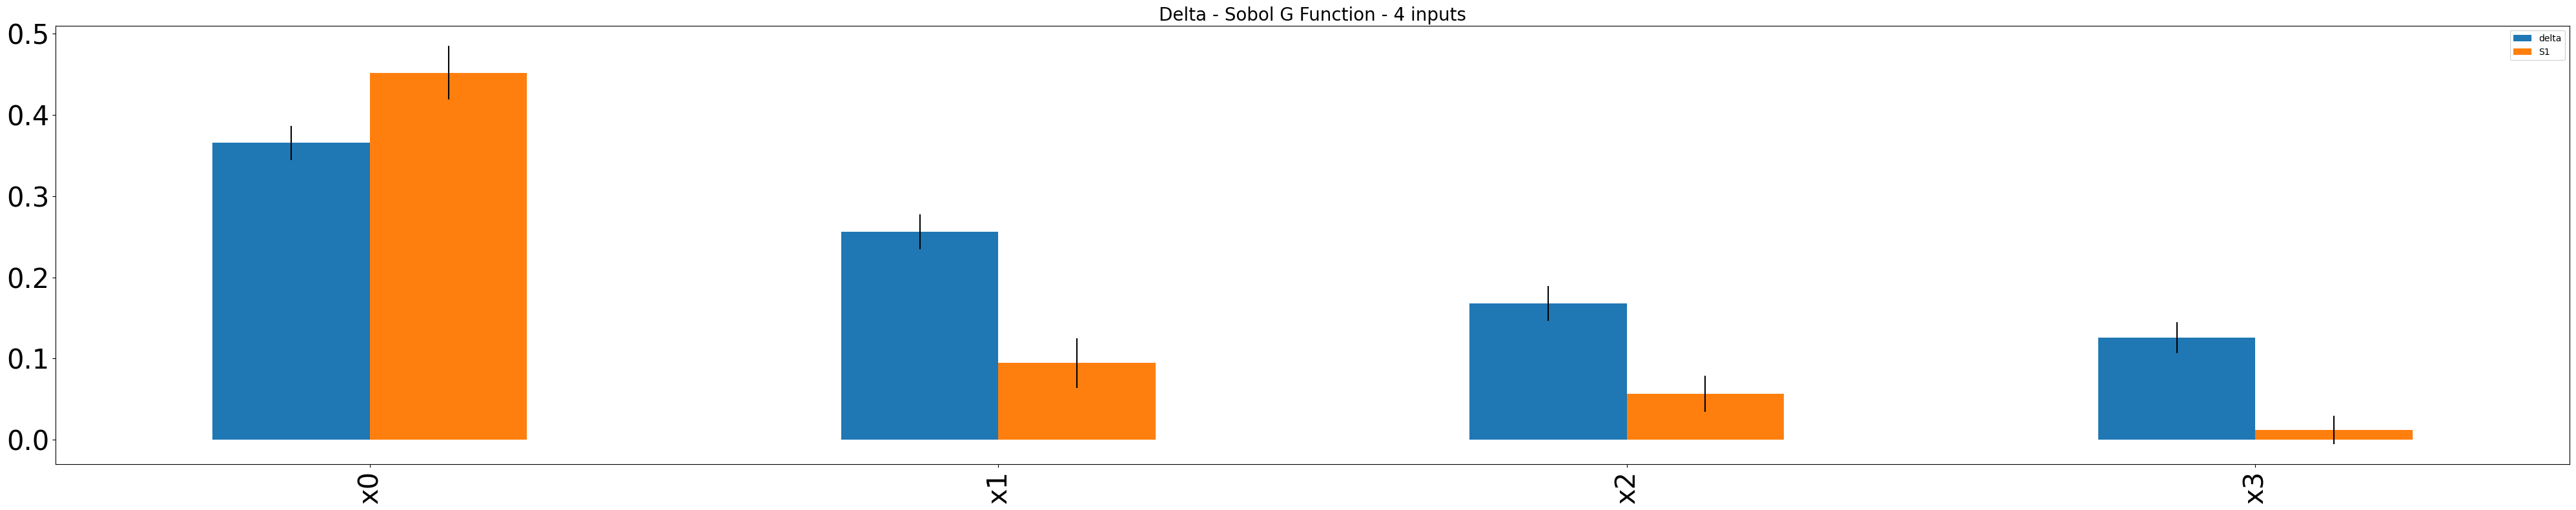

In [44]:
%%time
delta_sobol_g(4, sp_4, a_arr_4, delta_arr_4)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
        delta  delta_conf        S1   S1_conf
x0   0.341132    0.028559  0.281724  0.053900
x1   0.252614    0.025997  0.073429  0.035231
x2   0.100814    0.022971  0.029773  0.018775
x3   0.118369    0.022567  0.018306  0.019035
x4   0.125593    0.022939  0.017262  0.018653
x5   0.117648    0.017598  0.014702  0.011009
x6   0.082147    0.017043  0.018956  0.013963
x7   0.111499    0.018718  0.013055  0.012251
x8   0.092629    0.016433  0.008754  0.011032
x9   0.100085    0.018124  0.005096  0.015300
x10  0.121077    0.015173  0.008741  0.013626
x11  0.082968    0.014506  0.011013  0.010729
x12  0.110773    0.015301  0.009502  

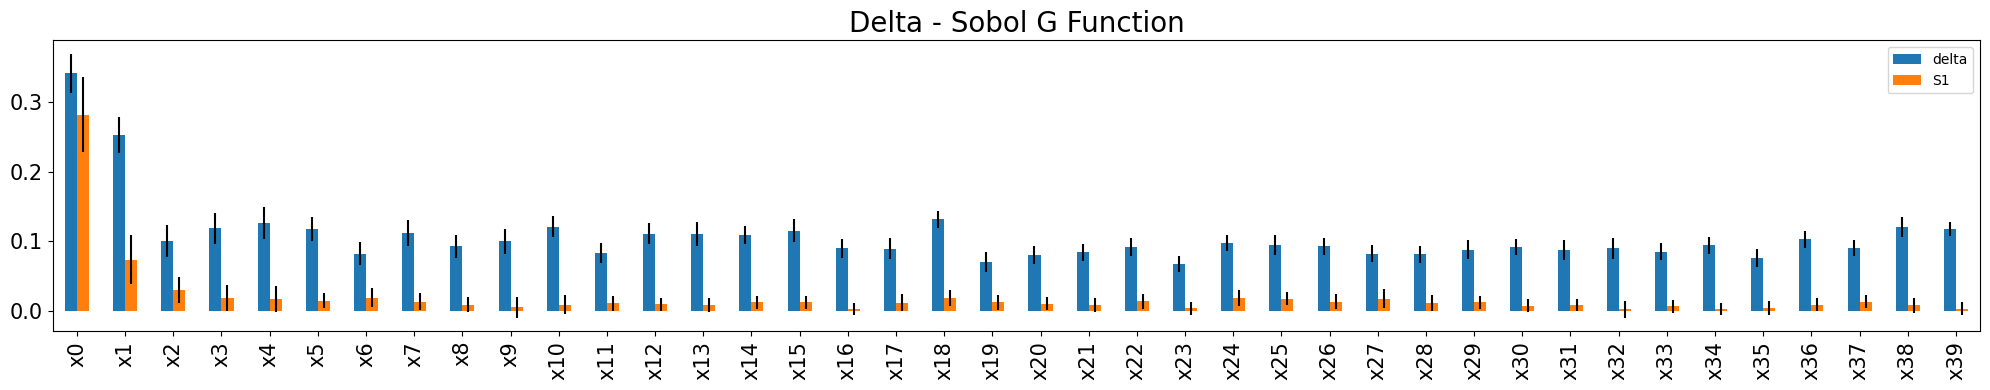

In [42]:
delta_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

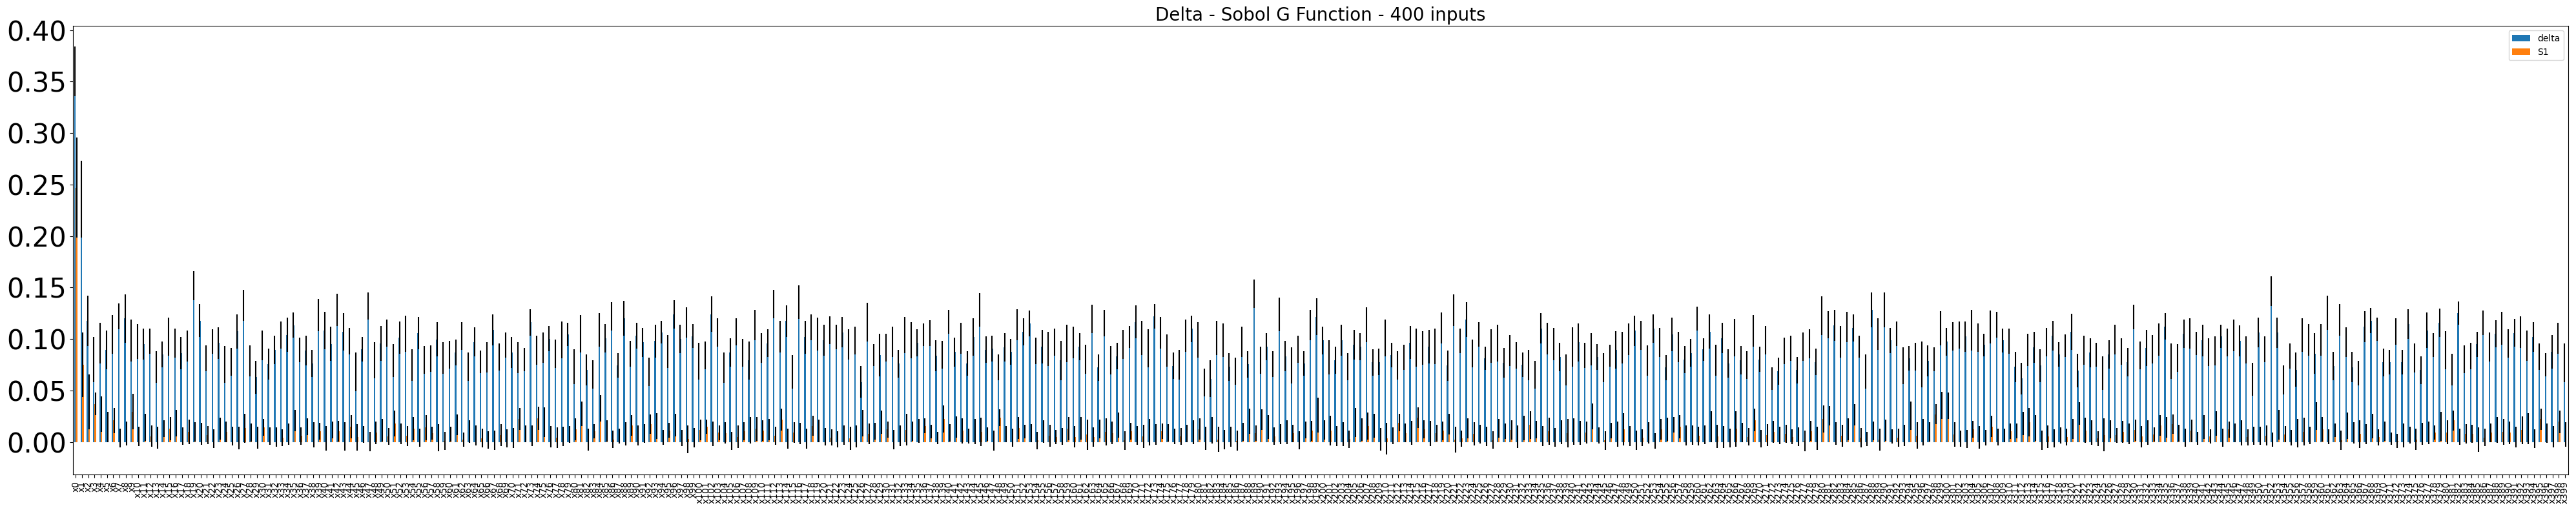

In [46]:
%%time
delta_sobol_g(400, sp_400, a_arr_400, delta_arr_400)

# PAWN

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
      minimum      mean    median   maximum        CV
x0   0.262657  0.428054  0.365690  0.761719  0.401356
x1   0.112573  0.194647  0.166462  0.332031  0.395824
x2   0.052147  0.108110  0.111517  0.170535  0.334894
x3   0.053156  0.089621  0.075579  0.136355  0.352007
x4   0.044156  0.108004  0.107211  0.171435  0.360569
x5   0.053902  0.079641  0.074203  0.129153  0.251962
x6   0.051892  0.084116  0.086369  0.117015  0.249383
x7   0.066217  0.086540  0.073035  0.171760  0.351445
x8   0.041801  0.089880  0.083109  0.145948  0.333181
x9   0.050781  0.093893  0.091826  0.159639  0.339327
x10  0.039580  0.073584  0.069398  0.1421

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


CPU times: user 1.04 s, sys: 219 ms, total: 1.26 s
Wall time: 972 ms


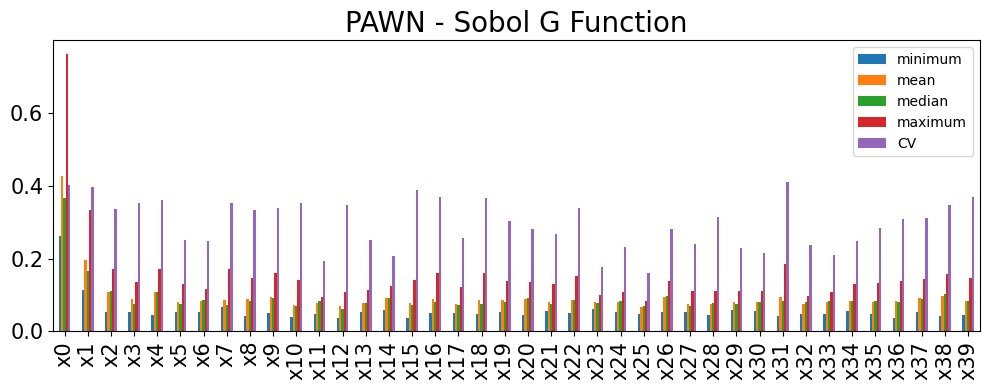

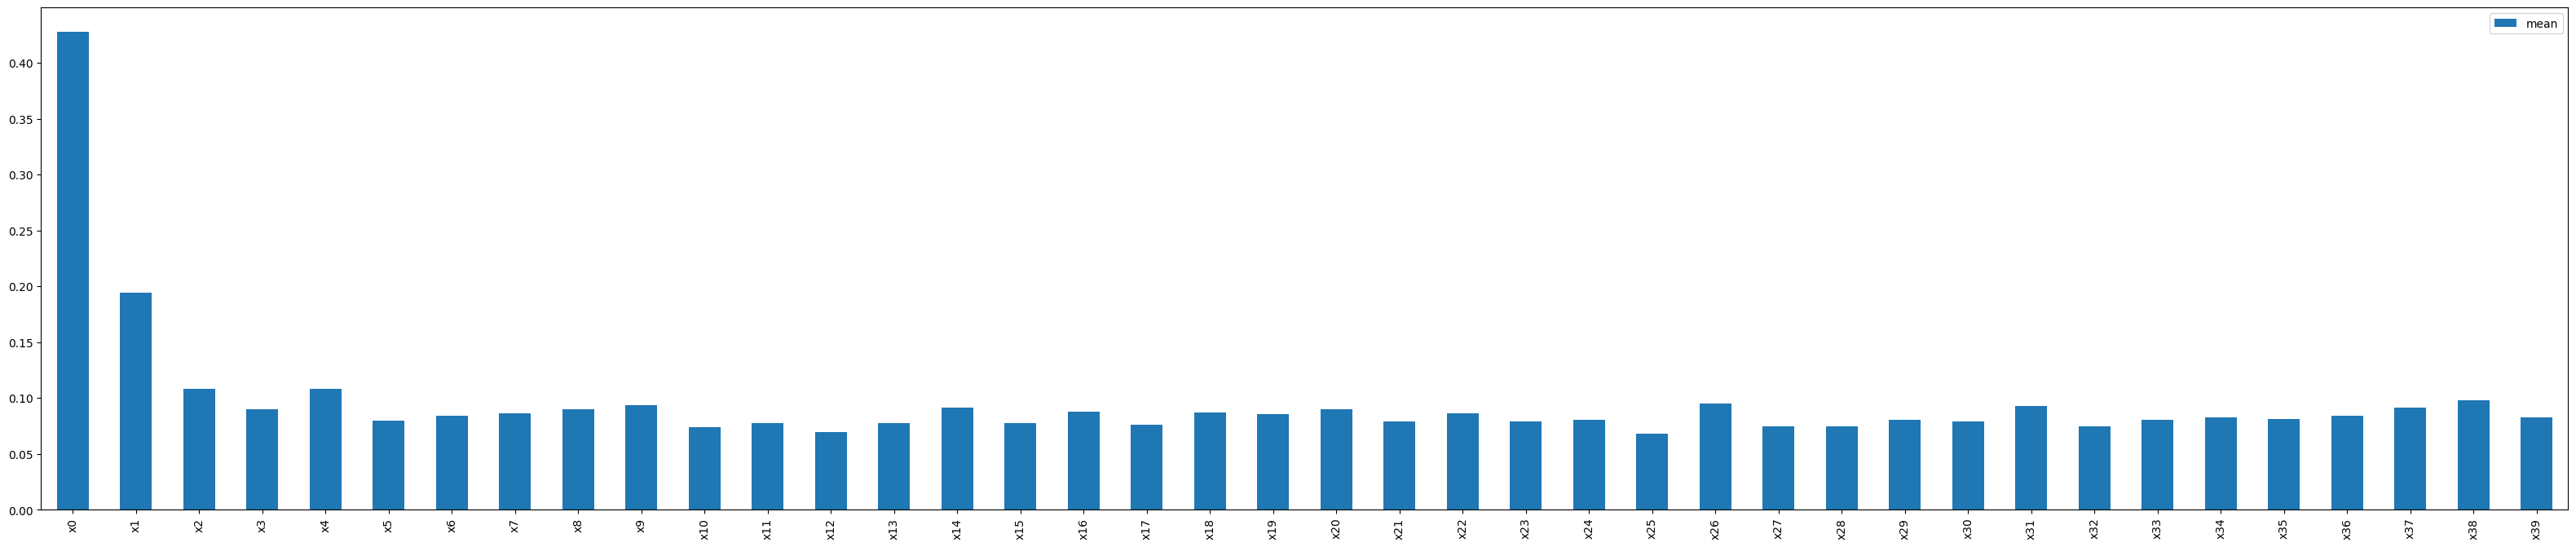

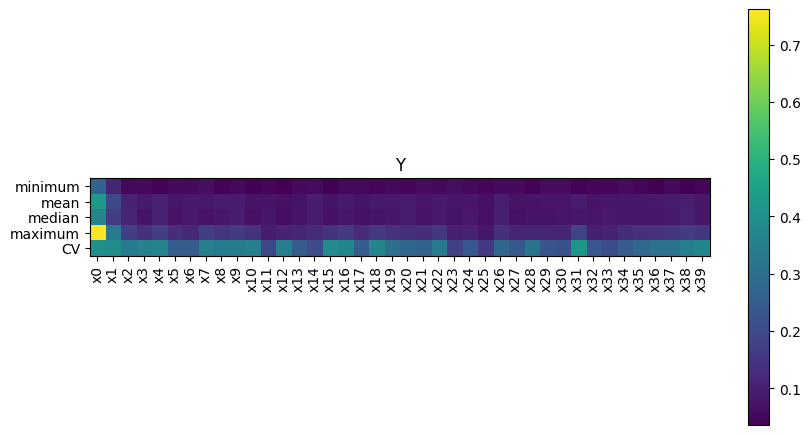

In [44]:
%%time
# ==== PAWN ~ Sobol G-Function ===
def pawn_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list, log_bool=False):

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_pawn())   
    
    print(sp)
    print(type(sp))

    df = sp.to_df() # convert to pandas dataframe object
    print("\n ----- dataframe: ", df)
    print(df["mean"])

    # === Plotting results ===

    axes = sp.plot()
    if log_bool:
        axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(10, 4)
    plt.title(label=f"PAWN - Sobol G Function - {n} inputs", size=20)
    plt.yticks(fontsize=30)
    if n < 100:
        plt.xticks(fontsize=30)
    axes.set_title(label=f"PAWN - Sobol G Function", size=20)
    axes.tick_params(axis='x', labelsize=15)
    axes.tick_params(axis='y', labelsize=15)
    plt.tight_layout()
    
    df.plot.bar(y="mean", figsize=(40, 8))
    sp.heatmap()

pawn_sobol_g(40, sp_40, a_arr_40, delta_arr_40)
# pawn_sobol_g(4, sp_4, a_arr_4, delta_arr_4)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
     minimum      mean    median   maximum        CV
x0  0.284620  0.432432  0.374769  0.757812  0.388671
x1  0.110562  0.206264  0.171450  0.360639  0.401682
x2  0.085286  0.123142  0.118604  0.179381  0.261312
x3  0.068701  0.122434  0.116919  0.172017  0.314965

dataframe:       minimum      mean    median   maximum        CV
x0  0.284620  0.432432  0.374769  0.757812  0.388671
x1  0.110562  0.206264  0.171450  0.360639  0.401682
x2  0.085286  0.123142  0.118604  0.179381  0.261312
x3  0.068701  0.122434  0.116919  0.172017  0.314965
CPU times: user 97.3 ms, sys: 59.8 ms, total: 157 ms
Wall time: 111 ms


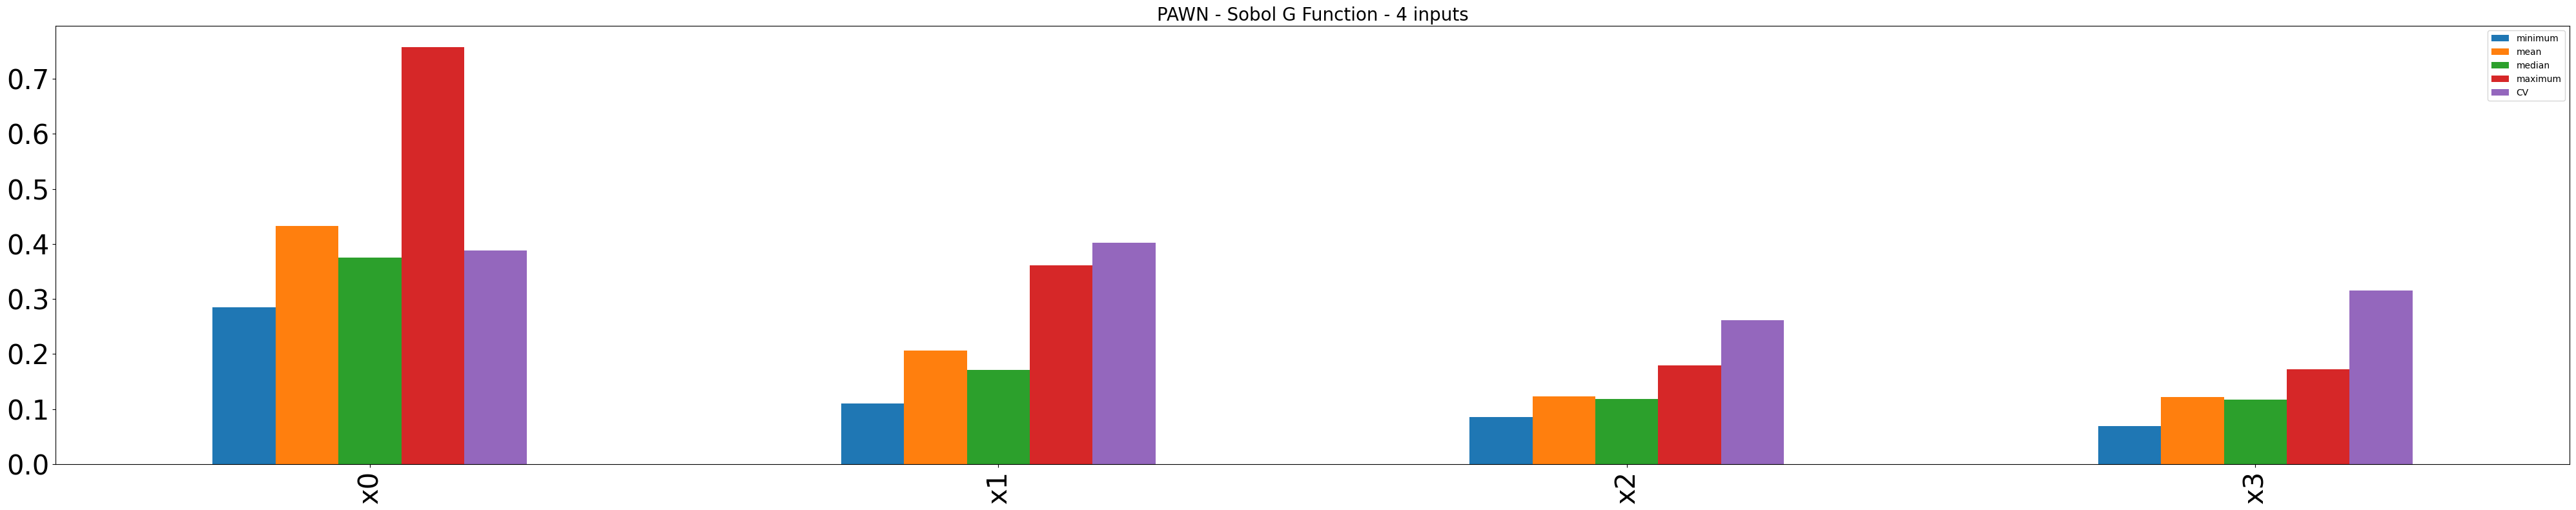

In [53]:
%%time
pawn_sobol_g(4, sp_4, a_arr_4, delta_arr_4)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
      minimum      mean    median   maximum        CV
x0   0.271446  0.434738  0.376977  0.764610  0.389096
x1   0.071040  0.187100  0.162414  0.354818  0.495490
x2   0.049805  0.127149  0.112477  0.198906  0.392913
x3   0.050915  0.100622  0.108226  0.152657  0.338371
x4   0.058613  0.091477  0.080988  0.153837  0.331935
x5   0.044249  0.097881  0.093003  0.177945  0.363133
x6   0.049568  0.082951  0.075158  0.141180  0.325367
x7   0.054496  0.098486  0.086435  0.174160  0.370936
x8   0.054017  0.087848  0.084597  0.138416  0.267418
x9   0.066081  0.094725  0.086167  0.169562  0.327162
x10  0.052505  0.082177  0.072654  0.1573

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


CPU times: user 614 ms, sys: 219 ms, total: 834 ms
Wall time: 523 ms


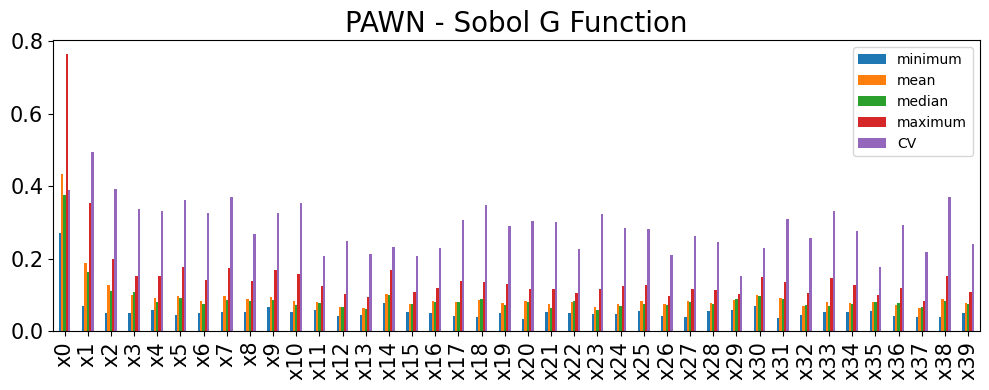

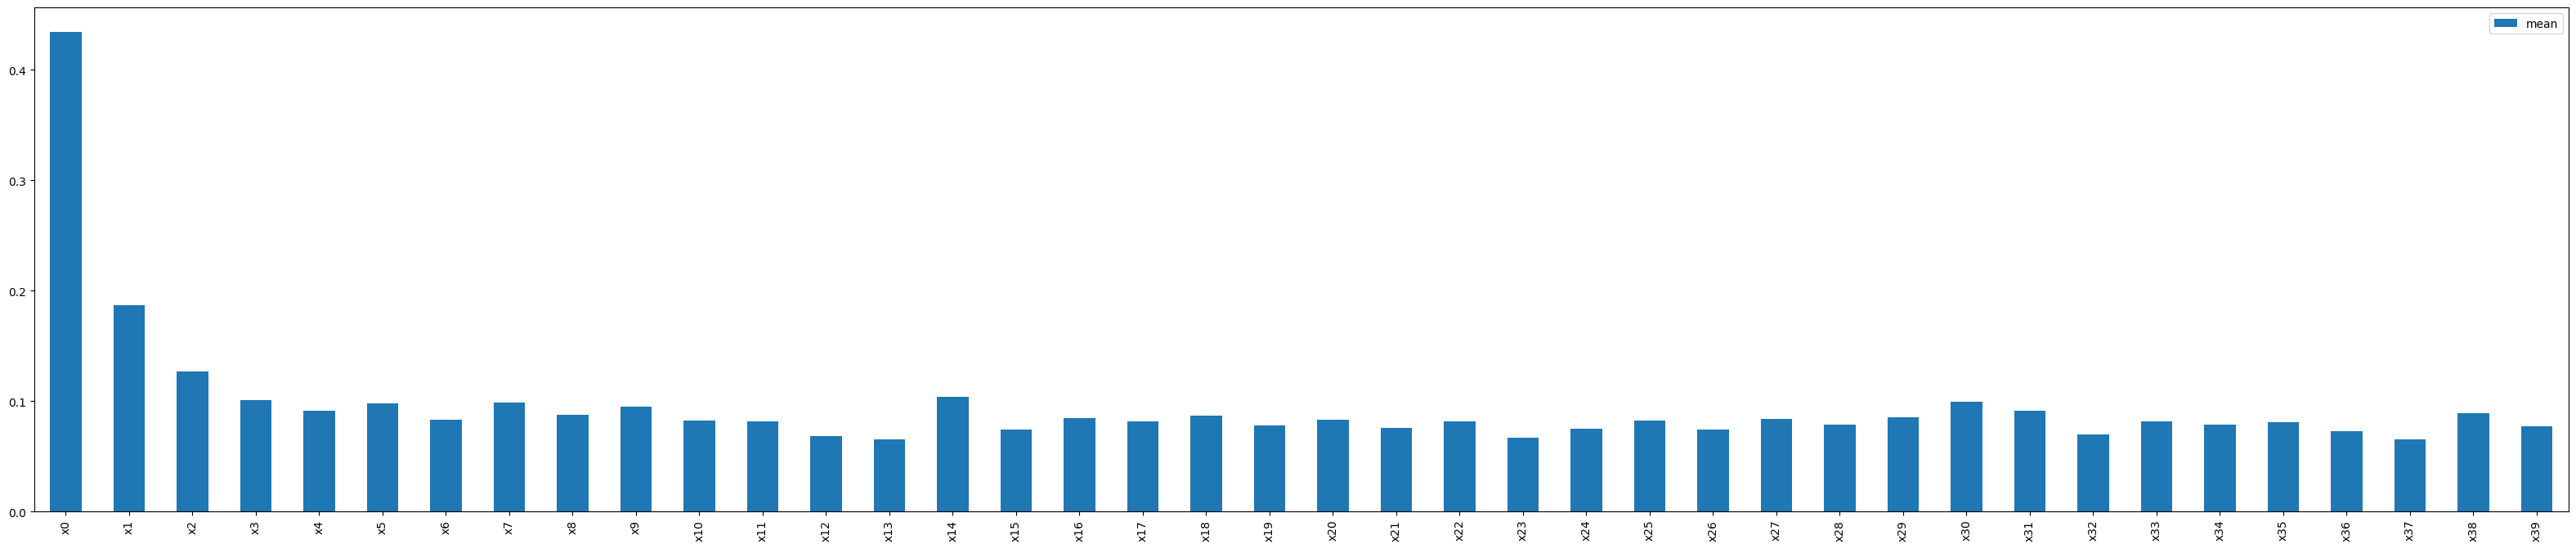

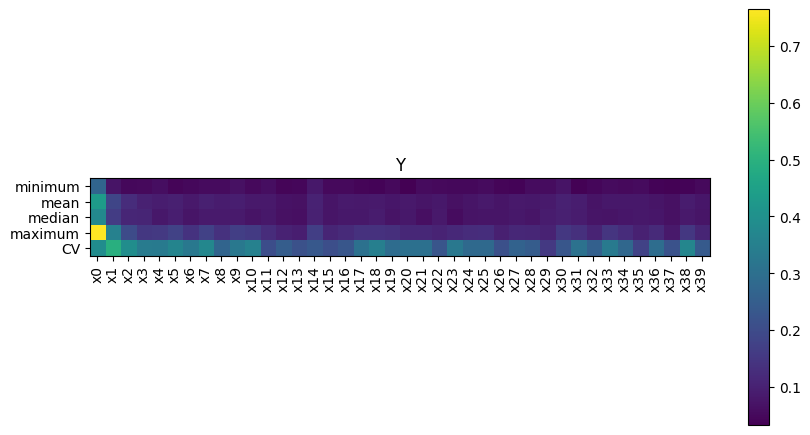

In [45]:
%%time
pawn_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

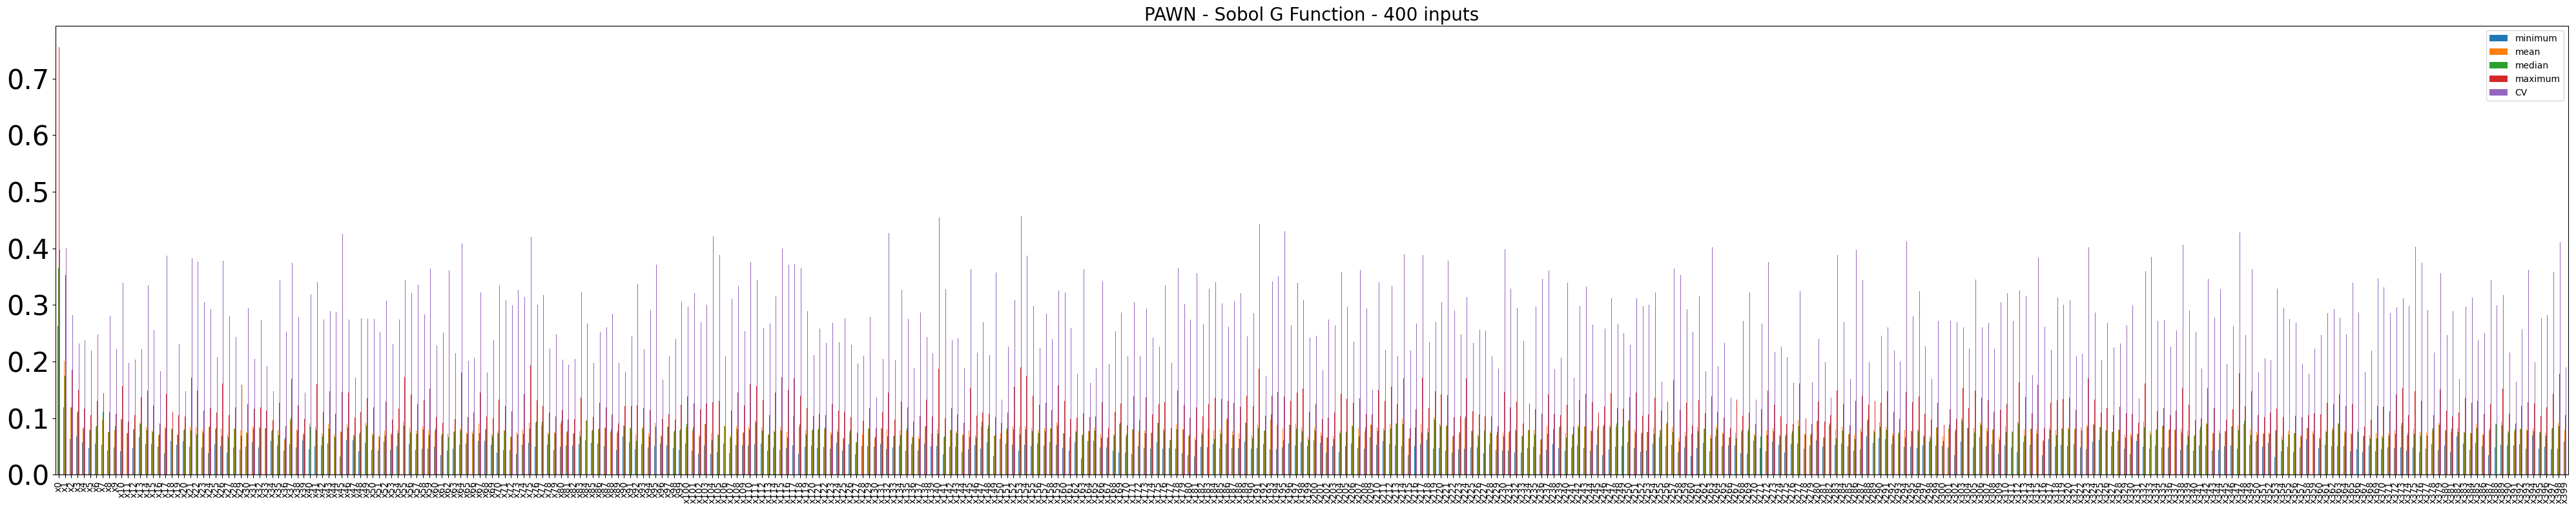

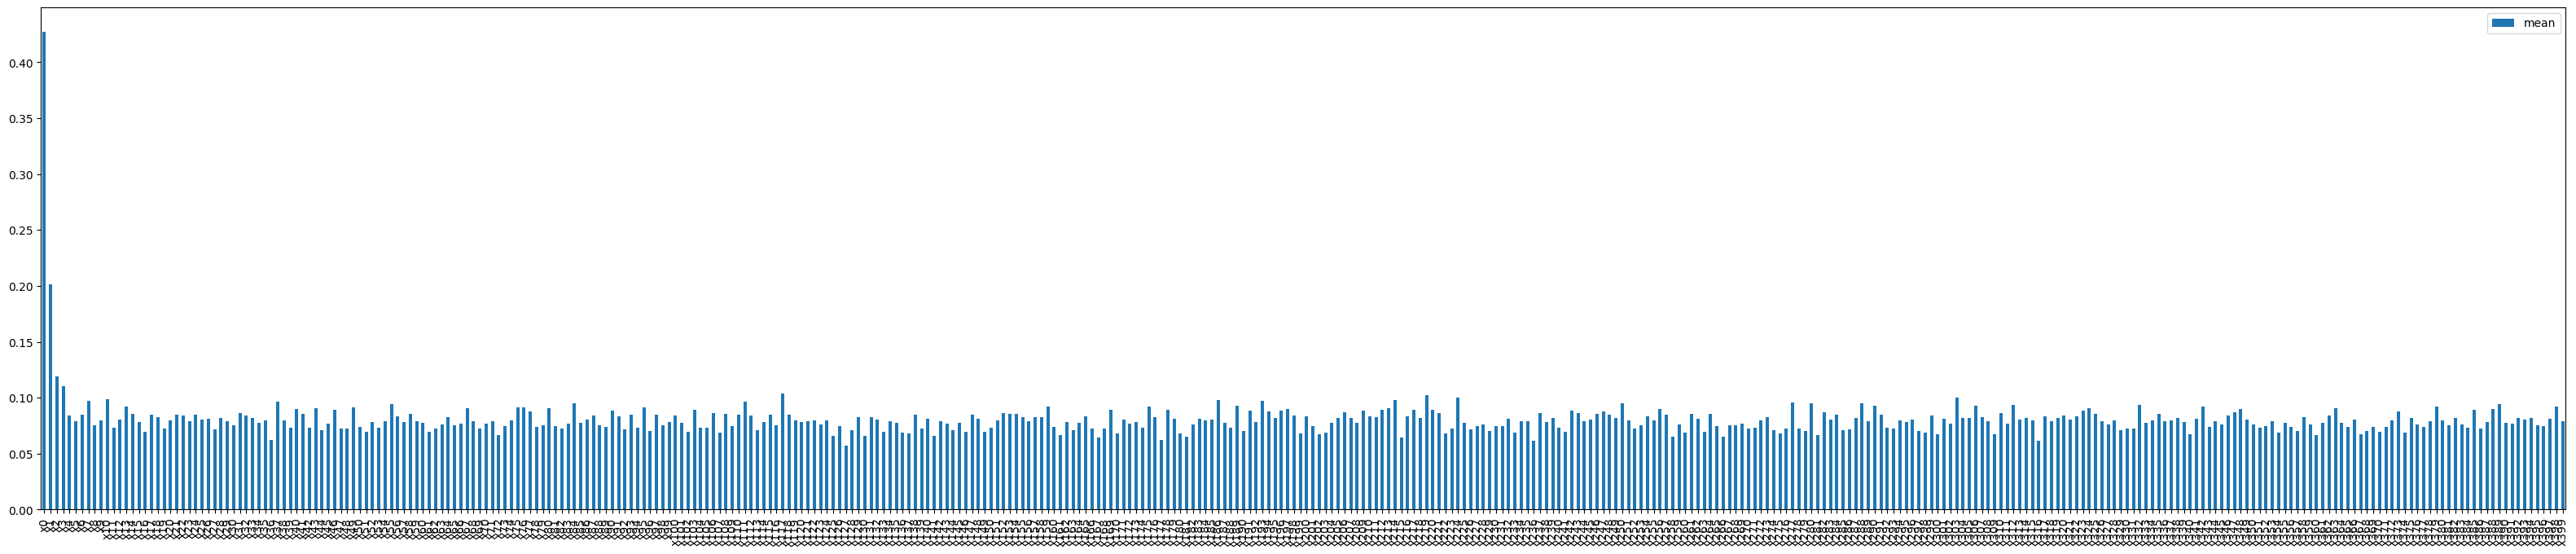

In [70]:
%%time
pawn_sobol_g(400, sp_400, a_arr_400, delta_arr_400)

# Method of Morris

In [ ]:
# ==== Method of Morris ~ Sobol G-Function ===
def morris_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list):

    (sp.sample_morris(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_morris())
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    # axes[0].set_yscale('log') # set plot to log scale
    # axes[1].set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"Method of Morris - Sobol G Function - {n} inputs")
    plt.tight_layout()

    sp.heatmap(title=f"Method of Morris - {n} inputs ")

morris_sobol_g(4, sp_4, a_arr_4, delta_arr_4)
morris_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

In [ ]:
%%time
morris_sobol_g(400, sp_400, a_arr_400, delta_arr_400)